In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [5]:
mushrooms = pd.read_csv('MushroomDataset.csv')
mushrooms.head()

,type,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [7]:
mushrooms.shape

(5644, 23)

e    3488
p    2156
Name: type, dtype: int64


<AxesSubplot:>

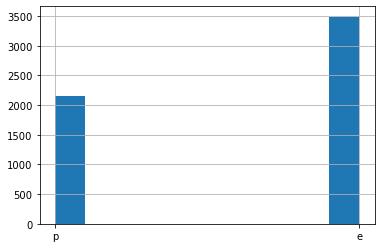

In [17]:
mushrooms['type'].unique()
print(mushrooms['type'].value_counts())
mushrooms['type'].hist()
#mushrooms['type'].value_counts().plot(kind='bar')

In [19]:
#Write a python function to compute the Hamming distance between two character lists of fixed length.
def HammingDist(A, B):
    # Your function here
    if len(A) != len(B):
        raise ValueError("Undefined for sequences of unequal length")
    return sum(el1 != el2 for el1, el2 in zip(A, B))

A = ['a','c','d','e','c','d','e']
B = ['b','c','b','e','a','c','d']
HammingDist(A, B)

5

In [77]:
#Using Hamming Distance defined above as the distance metric, 
#build own kNN classifier for the following k values: 10, 50, 100, 200, 500. 
#Compute average test accuracies after randomly sampling your dataset 10 times for each k value,


mushrooms = pd.read_csv('MushroomDataset.csv')

feature_names = list(mushrooms)[1:]
features = mushrooms[feature_names]
labels = mushrooms.iloc[:,0]
labels

features_list=features.values.tolist()
labels_list=labels.values.tolist()



In [78]:
###_Auxiliary Function_###
#%%
def HammingDist(A, B):
    # Your function here
    if len(A) != len(B):
        raise ValueError("Undefined for sequences of unequal length")
    
    return sum(el1 != el2 for el1, el2 in zip(A, B))


## sort all features_train based on distance with f_test
def SortDistance(features_train, f_test): 
    distances=[]
    for f_train in features_train:
        d=HammingDist(f_test,f_train)
        distances.append(d)
    
    dist_index=np.argsort(distances)
    
    return dist_index

## find nearest k features_train based on dist_index
def FindNeighbors(dist_index, k): 
    labels_train_neighbors=[]
    for i in dist_index[0:k]:
        labels_train_neighbors.append(labels_train[i] )
        
    return labels_train_neighbors; 

## find label count in nearest k neighbors
def CalculateNeighborsClass(labels_train_neighbors, k): 
    count = {}; 
    for i in range(k): 
        if(labels_train_neighbors[i] not in count): 
            # The class at the ith index is not in the count dict. 
            # Initialize it to 1. 
            count[labels_train_neighbors[i]]= 1; 
        else: 
            # Found another item of class c[i]. Increment its counter. 
            count[labels_train_neighbors[i]] += 1; 

    return count; 

def FindMax(countList): 
    # Hold the max 
    maximum = -1; 
    # Hold the classification 
    classification = ""; 
    for key in countList.keys(): 
        if(countList[key] > maximum): 
            maximum = countList[key]; 
            classification = key; 

    return classification, maximum; 

###
def Classify(features_train, features_test, k):
  
    labels = [] 
  
    for item in features_test: 
        
        dist_index = SortDistance(features_train, item)
        
        neighbors = FindNeighbors(dist_index, k)
  
        countList = CalculateNeighborsClass(neighbors, k) 
      
        label, count = FindMax(countList) 
        
        labels.append(label)
    
    return labels


*******************************************
************    K =  10   ******************
*******************************************
0 --> Calculating KNN...
Accuracy is:  100.0 %
1 --> Calculating KNN...
Accuracy is:  99.77856510186005 %
2 --> Calculating KNN...
Accuracy is:  99.73427812223207 %
3 --> Calculating KNN...
Accuracy is:  99.77856510186005 %
4 --> Calculating KNN...
Accuracy is:  99.77856510186005 %
5 --> Calculating KNN...
Accuracy is:  99.64570416297609 %
6 --> Calculating KNN...
Accuracy is:  100.0 %
7 --> Calculating KNN...
Accuracy is:  100.0 %
8 --> Calculating KNN...
Accuracy is:  99.86713906111603 %
9 --> Calculating KNN...
Accuracy is:  99.60141718334809 %
*******************************************
Accuracy of K =  10 is 99.81842338352524 %
*******************************************
*******************************************
************    K =  50   ******************
*******************************************
0 --> Calculating KNN...
Accuracy is:  99.4685562

Text(0, 0.5, 'accuracy %')

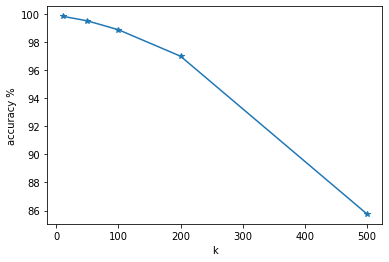

In [79]:
###_Main()_###
#%%
kList=[10, 50, 100, 200, 500]
mean_acc_k = {}
for k in kList:
    print('*******************************************')
    print('************    K = ', k , '  ******************')
    print('*******************************************')
    
    acc_record=[]
    for i in range(10):
        
        # random split
        features_train, features_test, labels_train, labels_test = \
            train_test_split(features_list, labels_list, test_size = 0.4) 
            
        print(i, '--> Calculating KNN...')
        labels_predicted = Classify(features_train, features_test, k)
    
        #print(i, '--> Calculating Accuracy...')
        acc=accuracy_score(labels_test, labels_predicted)
        acc_record.append(acc)                   
        print('Accuracy is: ', acc * 100, '%')
    
    mean_acc = np.mean(acc_record)
    mean_acc_k[k] = mean_acc
    print('*******************************************')
    print('Accuracy of K = ', k , 'is', mean_acc * 100, '%')
    print('*******************************************')
    
y=[i *100 for i in mean_acc_k.values()]
x=list(mean_acc_k.keys())
    
plt.plot(x,y,marker="*")
plt.xlabel("k")
plt.ylabel("accuracy %")
#plt.show()

    

In [4]:
import pandas as pd
glass = pd.read_csv('GlassDataset.csv')
glass.head()

,RefractiveIndex,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,1


2    68
1    67
Name: Type, dtype: int64


<AxesSubplot:>

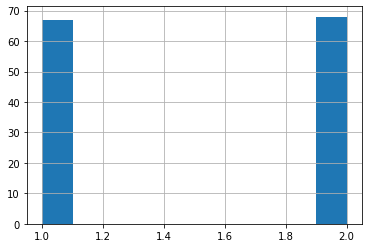

In [26]:
glass.shape
print(glass['Type'].value_counts())
glass['Type'].hist()

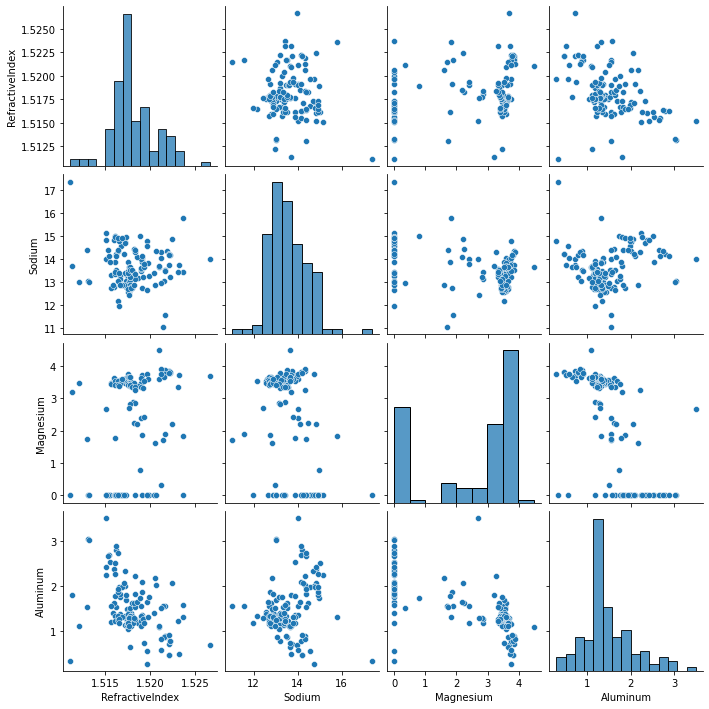

In [29]:
import seaborn as sns
sns.pairplot(glass,vars=["RefractiveIndex","Sodium","Magnesium","Aluminum"])

In [46]:
feature_names = ['RefractiveIndex','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium']
features = glass[feature_names]
labels = glass['Type']

from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb

ClassifierModel = mnb.fit(features,labels)
ClassifierModel

from sklearn.metrics import accuracy_score
print('mnbAccuracy is:',accuracy_score(labels,ClassifierModel.predict(features))* 100, '%')

##
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb

ClassifierModel = gnb.fit(features,labels)
ClassifierModel

print('gnbAccuracy is:',accuracy_score(labels,ClassifierModel.predict(features))* 100, '%')


mnbAccuracy is: 83.7037037037037 %
gnbAccuracy is: 84.44444444444444 %


In [ ]:
# feature_names = ['RefractiveIndex','Sodium','Magnesium','Aluminum','Silicon','Potassium','Calcium']
features = glass[feature_names]
labels = glass['Type']

from sklearn.model_selection import train_test_split
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size = 0.2)

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10) # 

trainedClassifier = classifier.fit(features_train, labels_train)

predicted = trainedClassifier.predict(features_test)
predicted

from sklearn.metrics import accuracy_score
print('Accuracy is: ', accuracy_score(labels_test, predicted) * 100, '%')